In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  
%run -i /home/cz136/project/sa/lib/src/corr_func.py  

In [4]:
# z_diff=float(z_diff)

In [5]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [6]:
if vol!="uber":
    members=shapes

In [7]:
if quantile!="":
    i=int(quantile)

In [8]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')

In [9]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [10]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [11]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [12]:
NBINS=10

In [13]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [14]:
len(shapes)

89624

In [15]:
len(members)

89624

In [16]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [17]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

19it [00:00, 185.59it/s]

40it [00:00, 190.26it/s]

62it [00:00, 196.27it/s]

84it [00:00, 200.96it/s]

106it [00:00, 203.68it/s]

128it [00:00, 206.04it/s]

150it [00:00, 209.41it/s]

172it [00:00, 211.73it/s]

194it [00:00, 213.79it/s]

216it [00:01, 215.18it/s]

238it [00:01, 215.62it/s]

260it [00:01, 215.43it/s]

282it [00:01, 215.88it/s]

304it [00:01, 213.26it/s]

326it [00:01, 199.41it/s]

347it [00:01, 191.08it/s]

367it [00:01, 185.64it/s]

386it [00:01, 182.00it/s]

405it [00:02, 179.47it/s]

424it [00:02, 177.62it/s]

445it [00:02, 184.95it/s]

467it [00:02, 192.46it/s]

489it [00:02, 198.28it/s]

510it [00:02, 201.59it/s]

531it [00:02, 203.50it/s]

553it [00:02, 206.10it/s]

575it [00:02, 207.97it/s]

596it [00:02, 208.51it/s]

618it [00:03, 209.60it/s]

640it [00:03, 210.45it/s]

662it [00:03, 210.40it/s]

684it [00:03, 210.83it/s]

706it [00:03, 210.65it/s]

728it [00:03, 210.63it/s]

750it [00:03, 210.53it/s]

772it [00:03, 210.70it/s]

794it [00:03, 205.35it/s]

815it [00:03, 205.15it/s]

836it [00:04, 203.74it/s]

857it [00:04, 195.60it/s]

879it [00:04, 200.08it/s]

900it [00:04, 197.84it/s]

921it [00:04, 199.83it/s]

942it [00:04, 201.76it/s]

963it [00:04, 188.28it/s]

983it [00:04, 185.52it/s]

1005it [00:04, 194.00it/s]

1027it [00:05, 199.32it/s]

1049it [00:05, 204.11it/s]

1071it [00:05, 207.00it/s]

1093it [00:05, 209.53it/s]

1115it [00:05, 204.64it/s]

1137it [00:05, 206.97it/s]

1158it [00:05, 142.83it/s]

1179it [00:05, 157.72it/s]

1198it [00:06, 154.75it/s]

1216it [00:06, 116.18it/s]

1231it [00:06, 123.83it/s]

1253it [00:06, 139.59it/s]

1273it [00:06, 152.74it/s]

1296it [00:06, 168.16it/s]

1317it [00:06, 176.92it/s]

1340it [00:06, 188.04it/s]

1360it [00:07, 190.80it/s]

1381it [00:07, 194.46it/s]

1402it [00:07, 197.23it/s]

1423it [00:07, 199.71it/s]

1444it [00:07, 199.91it/s]

1465it [00:07, 200.71it/s]

1486it [00:07, 201.68it/s]

1508it [00:07, 204.79it/s]

1530it [00:07, 206.49it/s]

1551it [00:07, 207.19it/s]

1573it [00:08, 208.16it/s]

1595it [00:08, 209.21it/s]

1616it [00:08, 209.05it/s]

1638it [00:08, 210.79it/s]

1660it [00:08, 210.67it/s]

1682it [00:08, 210.27it/s]

1704it [00:08, 206.02it/s]

1725it [00:08, 203.79it/s]

1747it [00:08, 205.99it/s]

1769it [00:09, 208.06it/s]

1791it [00:09, 210.00it/s]

1813it [00:09, 210.89it/s]

1835it [00:09, 198.53it/s]

1856it [00:09, 197.66it/s]

1876it [00:09, 196.96it/s]

1896it [00:09, 191.87it/s]

1916it [00:09, 187.87it/s]

1937it [00:09, 193.52it/s]

1959it [00:09, 200.60it/s]

1981it [00:10, 205.91it/s]

2002it [00:10, 145.93it/s]

2020it [00:10, 148.44it/s]

2037it [00:10, 153.64it/s]

2054it [00:10, 157.89it/s]

2071it [00:10, 161.23it/s]

2088it [00:10, 163.61it/s]

2109it [00:10, 174.24it/s]

2130it [00:11, 182.73it/s]

2151it [00:11, 188.78it/s]

2172it [00:11, 193.63it/s]

2193it [00:11, 196.45it/s]

2214it [00:11, 198.69it/s]

2235it [00:11, 200.15it/s]

2256it [00:11, 200.80it/s]

2277it [00:11, 201.89it/s]

2298it [00:11, 199.75it/s]

2319it [00:11, 200.37it/s]

2340it [00:12, 201.69it/s]

2361it [00:12, 200.84it/s]

2383it [00:12, 203.85it/s]

2405it [00:12, 207.46it/s]

2428it [00:12, 211.05it/s]

2450it [00:12, 212.89it/s]

2472it [00:12, 214.42it/s]

2494it [00:12, 216.03it/s]

2517it [00:12, 217.65it/s]

2540it [00:13, 218.69it/s]

2562it [00:13, 218.45it/s]

2585it [00:13, 219.06it/s]

2608it [00:13, 219.64it/s]

2630it [00:13, 219.25it/s]

2653it [00:13, 219.57it/s]

2675it [00:13, 219.02it/s]

2698it [00:13, 219.50it/s]

2720it [00:13, 214.41it/s]

2742it [00:13, 211.61it/s]

2764it [00:14, 212.58it/s]

2786it [00:14, 197.38it/s]

2806it [00:14, 183.94it/s]

2825it [00:14, 181.17it/s]

2844it [00:14, 178.59it/s]

2863it [00:14, 176.48it/s]

2881it [00:14, 168.99it/s]

2899it [00:14, 164.41it/s]

2920it [00:14, 174.17it/s]

2942it [00:15, 183.99it/s]

2964it [00:15, 191.43it/s]

2986it [00:15, 197.17it/s]

3007it [00:15, 200.54it/s]

3029it [00:15, 203.57it/s]

3050it [00:15, 205.13it/s]

3071it [00:15, 206.44it/s]

3093it [00:15, 207.93it/s]

3114it [00:15, 208.19it/s]

3135it [00:16, 203.66it/s]

3157it [00:16, 206.78it/s]

3178it [00:16, 200.66it/s]

3199it [00:16, 193.98it/s]

3219it [00:16, 189.60it/s]

3239it [00:16, 186.60it/s]

3258it [00:16, 184.71it/s]

3277it [00:16, 183.42it/s]

3296it [00:16, 180.42it/s]

3317it [00:16, 186.61it/s]

3340it [00:17, 195.63it/s]

3362it [00:17, 201.85it/s]

3384it [00:17, 206.69it/s]

3406it [00:17, 209.91it/s]

3428it [00:17, 211.74it/s]

3450it [00:17, 213.34it/s]

3473it [00:17, 215.64it/s]

3495it [00:17, 216.19it/s]

3517it [00:17, 216.78it/s]

3540it [00:18, 217.79it/s]

3562it [00:18, 215.32it/s]

3584it [00:18, 215.18it/s]

3606it [00:18, 216.12it/s]

3628it [00:18, 216.68it/s]

3650it [00:18, 216.71it/s]

3673it [00:18, 217.75it/s]

3695it [00:18, 217.67it/s]

3717it [00:18, 218.33it/s]

3740it [00:18, 219.03it/s]

3762it [00:19, 218.20it/s]

3769it [00:19, 197.64it/s]


0it [00:00, ?it/s]

23it [00:00, 223.26it/s]

Number of empty sat catalogs is 0


46it [00:00, 223.58it/s]

69it [00:00, 224.23it/s]

92it [00:00, 223.93it/s]

115it [00:00, 224.88it/s]

139it [00:00, 226.28it/s]

160it [00:00, 218.83it/s]

183it [00:00, 221.59it/s]

206it [00:00, 223.11it/s]

229it [00:01, 224.63it/s]

252it [00:01, 225.68it/s]

275it [00:01, 226.89it/s]

298it [00:01, 227.62it/s]

321it [00:01, 217.76it/s]

343it [00:01, 205.49it/s]

364it [00:01, 194.85it/s]

387it [00:01, 203.01it/s]

410it [00:01, 209.61it/s]

433it [00:01, 214.96it/s]

456it [00:02, 219.06it/s]

479it [00:02, 204.69it/s]

502it [00:02, 210.86it/s]

525it [00:02, 215.87it/s]

548it [00:02, 219.30it/s]

571it [00:02, 221.98it/s]

594it [00:02, 224.19it/s]

617it [00:02, 225.61it/s]

640it [00:02, 226.64it/s]

663it [00:03, 227.22it/s]

686it [00:03, 227.99it/s]

709it [00:03, 228.35it/s]

733it [00:03, 228.55it/s]

756it [00:03, 228.49it/s]

779it [00:03, 228.53it/s]

803it [00:03, 228.94it/s]

826it [00:03, 228.73it/s]

849it [00:03, 228.73it/s]

872it [00:03, 228.78it/s]

895it [00:04, 228.96it/s]

918it [00:04, 229.25it/s]

941it [00:04, 228.39it/s]

964it [00:04, 228.69it/s]

987it [00:04, 228.50it/s]

1010it [00:04, 228.70it/s]

1033it [00:04, 227.14it/s]

1056it [00:04, 227.67it/s]

1079it [00:04, 227.40it/s]

1102it [00:04, 227.93it/s]

1125it [00:05, 224.99it/s]

1148it [00:05, 225.78it/s]

1171it [00:05, 216.17it/s]

1193it [00:05, 205.45it/s]

1214it [00:05, 199.24it/s]

1235it [00:05, 195.06it/s]

1255it [00:05, 180.19it/s]

1274it [00:05, 181.68it/s]

1295it [00:05, 187.25it/s]

1317it [00:06, 195.93it/s]

1339it [00:06, 202.29it/s]

1362it [00:06, 208.91it/s]

1385it [00:06, 213.29it/s]

1408it [00:06, 216.77it/s]

1431it [00:06, 218.71it/s]

1454it [00:06, 219.83it/s]

1477it [00:06, 221.65it/s]

1500it [00:06, 223.13it/s]

1523it [00:06, 222.94it/s]

1546it [00:07, 223.21it/s]

1569it [00:07, 222.97it/s]

1592it [00:07, 222.82it/s]

1615it [00:07, 222.27it/s]

1638it [00:07, 222.93it/s]

1661it [00:07, 223.48it/s]

1684it [00:07, 222.87it/s]

1707it [00:07, 223.15it/s]

1730it [00:07, 222.99it/s]

1753it [00:08, 223.02it/s]

1776it [00:08, 200.33it/s]

1797it [00:08, 194.46it/s]

1817it [00:08, 185.11it/s]

1836it [00:08, 183.95it/s]

1855it [00:08, 183.60it/s]

1874it [00:08, 183.18it/s]

1894it [00:08, 187.84it/s]

1917it [00:08, 196.59it/s]

1939it [00:08, 201.87it/s]

1962it [00:09, 207.46it/s]

1984it [00:09, 210.27it/s]

2007it [00:09, 213.35it/s]

2029it [00:09, 214.07it/s]

2051it [00:09, 215.40it/s]

2074it [00:09, 217.37it/s]

2097it [00:09, 218.83it/s]

2119it [00:09, 218.32it/s]

2142it [00:09, 219.24it/s]

2164it [00:10, 218.11it/s]

2187it [00:10, 219.19it/s]

2209it [00:10, 214.13it/s]

2231it [00:10, 195.98it/s]

2251it [00:10, 191.82it/s]

2271it [00:10, 188.89it/s]

2291it [00:10, 187.15it/s]

2310it [00:10, 180.60it/s]

2329it [00:10, 181.26it/s]

2349it [00:11, 185.24it/s]

2371it [00:11, 193.49it/s]

2391it [00:11, 189.73it/s]

2411it [00:11, 187.40it/s]

2430it [00:11, 184.45it/s]

2449it [00:11, 183.21it/s]

2468it [00:11, 183.46it/s]

2490it [00:11, 192.86it/s]

2513it [00:11, 201.00it/s]

2536it [00:11, 207.33it/s]

2559it [00:12, 211.05it/s]

2581it [00:12, 212.15it/s]

2604it [00:12, 215.53it/s]

2627it [00:12, 217.21it/s]

2649it [00:12, 217.53it/s]

2672it [00:12, 218.78it/s]

2694it [00:12, 219.00it/s]

2717it [00:12, 219.68it/s]

2740it [00:12, 220.63it/s]

2763it [00:12, 221.07it/s]

2787it [00:13, 223.68it/s]

2810it [00:13, 225.20it/s]

2833it [00:13, 226.48it/s]

2857it [00:13, 227.75it/s]

2881it [00:13, 228.80it/s]

2904it [00:13, 228.04it/s]

2927it [00:13, 227.13it/s]

2950it [00:13, 226.46it/s]

2974it [00:13, 227.33it/s]

2997it [00:14, 226.56it/s]

3020it [00:14, 226.55it/s]

3044it [00:14, 228.09it/s]

3067it [00:14, 219.87it/s]

3090it [00:14, 212.75it/s]

3112it [00:14, 211.87it/s]

3135it [00:14, 214.42it/s]

3158it [00:14, 217.23it/s]

3180it [00:14, 208.05it/s]

3201it [00:14, 197.85it/s]

3221it [00:15, 190.75it/s]

3241it [00:15, 186.57it/s]

3260it [00:15, 183.87it/s]

3279it [00:15, 181.89it/s]

3299it [00:15, 186.27it/s]

3321it [00:15, 193.74it/s]

3341it [00:15, 192.82it/s]

3361it [00:15, 192.19it/s]

3383it [00:15, 198.50it/s]

3405it [00:16, 202.91it/s]

3427it [00:16, 206.44it/s]

3449it [00:16, 208.91it/s]

3471it [00:16, 210.48it/s]

3493it [00:16, 211.78it/s]

3515it [00:16, 212.49it/s]

3537it [00:16, 212.51it/s]

3559it [00:16, 212.72it/s]

3581it [00:16, 213.74it/s]

3603it [00:16, 214.43it/s]

3625it [00:17, 214.78it/s]

3647it [00:17, 213.82it/s]

3669it [00:17, 214.40it/s]

3691it [00:17, 214.56it/s]

3713it [00:17, 214.60it/s]

3735it [00:17, 214.42it/s]

3757it [00:17, 210.64it/s]

3769it [00:17, 212.21it/s]

Number of empty sat catalogs is 0


In [18]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [19]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [20]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/home/cz136/project/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

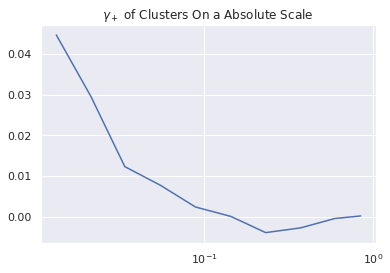

Aggregated xi:
[-30.389  -42.7478 -28.1227 -29.0679 -14.8435  -1.0472  56.6845  52.8952
   8.6161  -1.4385]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -2941.2195  -5563.4936  -7726.6525 -10882.7125 -14893.7228 -19166.7722
 -21398.8837 -19225.5646 -10815.5284  -1090.8655]
------------------------------------------------------------------------------
Aggregated npairs:
[  680.  1444.  2280.  3750.  6147.  9883. 14620. 19480. 20833.  6592.]
------------------------------------------------------------------------------
Mean xi:
[-0.0447 -0.0296 -0.0123 -0.0078 -0.0024 -0.0001  0.0039  0.0027  0.0004
 -0.0002]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3253 -3.8528 -3.3889 -2.9021 -2.4229 -1.9394 -1.4637 -0.9869 -0.5192
 -0.1655]
------------------------------------------------------------------------------


In [25]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

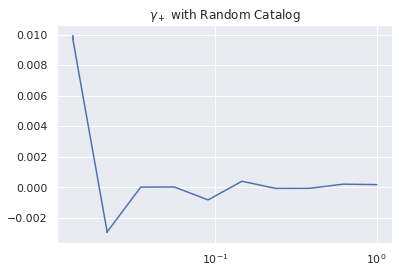

[ 9.8275e-03 -2.9159e-03  1.9740e-05  2.5301e-05 -8.2103e-04  3.9983e-04
 -6.5348e-05 -6.1656e-05  2.1127e-04  1.8010e-04]
[-1.6008e-04  4.7496e-05 -3.2153e-07 -4.1213e-07  1.3374e-05 -6.5127e-06
  1.0644e-06  1.0043e-06 -3.4413e-06 -2.9336e-06]


In [26]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

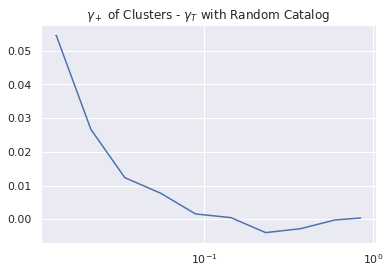

In [27]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

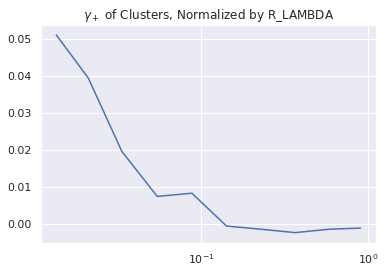

Aggregated xi:
[-19.1491 -39.3065 -36.8911 -21.4828 -39.2209   5.3848  18.7655  42.1478
  32.5249  20.738 ]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1611.8312  -3846.3817  -6414.5892  -8514.7546 -11613.3    -15219.4001
 -17901.5123 -17152.0412 -11249.4623  -1696.8627]
------------------------------------------------------------------------------
Aggregated npairs:
[  375.   997.  1890.  2930.  4781.  7802. 12131. 17094. 21121. 16691.]
------------------------------------------------------------------------------
Mean xi:
[-0.0511 -0.0394 -0.0195 -0.0073 -0.0082  0.0007  0.0015  0.0025  0.0015
  0.0012]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.2982 -3.858  -3.394  -2.9061 -2.4291 -1.9507 -1.4757 -1.0034 -0.5326
 -0.1017]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [28]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)